In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv("data/stud.csv")

In [50]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [51]:
df.shape

(1000, 8)

Exploring the data


In [52]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [53]:
df.duplicated().sum()

0

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [55]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [56]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [57]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [58]:
print("There are {} unique values in 'gender' column which are: {}".format(df["gender"].nunique(), df["gender"].unique()))
print("There are {} unique values in 'race_ethnicity' column which are: {}".format(df["race_ethnicity"].nunique(), df["race_ethnicity"].unique()))
print("There are {} unique values in 'parental_level_of_education' column which are: {}".format(df["parental_level_of_education"].nunique(), df["parental_level_of_education"].unique()))
print("There are {} unique values in 'lunch' column which are: {}".format(df["lunch"].nunique(), df["lunch"].unique()))
print("There are {} unique values in 'test_preparation_course' column which are: {}".format(df["test_preparation_course"].nunique(), df["test_preparation_course"].unique()))


There are 2 unique values in 'gender' column which are: ['female' 'male']
There are 5 unique values in 'race_ethnicity' column which are: ['group B' 'group C' 'group A' 'group D' 'group E']
There are 6 unique values in 'parental_level_of_education' column which are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
There are 2 unique values in 'lunch' column which are: ['standard' 'free/reduced']
There are 2 unique values in 'test_preparation_course' column which are: ['none' 'completed']


In [59]:
numerical_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [features for features in df.columns if df[features].dtype == 'O']

# the above code is similar to: 

# numerical_features = []
# for features in df.columns:
#     if df[features].dtype != 'O':
#         numerical_features.append(features)

print("Numerical features: {}".format(numerical_features))
print("Categorical features: {}".format(categorical_features))

Numerical features: ['math_score', 'reading_score', 'writing_score']
Categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [60]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average_score"] = df["total_score"]/2  

In [61]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,109.0
1,female,group C,some college,standard,completed,69,90,88,247,123.5
2,female,group B,master's degree,standard,none,90,95,93,278,139.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,74.0
4,male,group C,some college,standard,none,76,78,75,229,114.5


In [69]:
print("The number of students with 100 marks in math are: {}".format((df["math_score"] == 100).sum()))
print("The number of students with 100 marks in reading are: {}".format((df["reading_score"] == 100).sum()))
print("The number of students with 100 marks in writing are: {}".format((df["writing_score"] == 100).sum()))

The number of students with 100 marks in math are: 7
The number of students with 100 marks in reading are: 17
The number of students with 100 marks in writing are: 14


In [70]:
print("The number of students with less than 20 marks in math are: {}".format((df["math_score"] <= 20).sum()))
print("The number of students with less than 20 marks in reading are: {}".format((df["reading_score"] <= 20).sum()))
print("The number of students with less than 20 marks in writing are: {}".format((df["writing_score"] <= 20).sum()))

The number of students with less than 20 marks in math are: 4
The number of students with less than 20 marks in reading are: 1
The number of students with less than 20 marks in writing are: 3


Insights

From the above values we get to know that 
- Students have performed worst in math
- Students have performed best in writing 

Visualizing Data


<Axes: xlabel='average_score', ylabel='Count'>

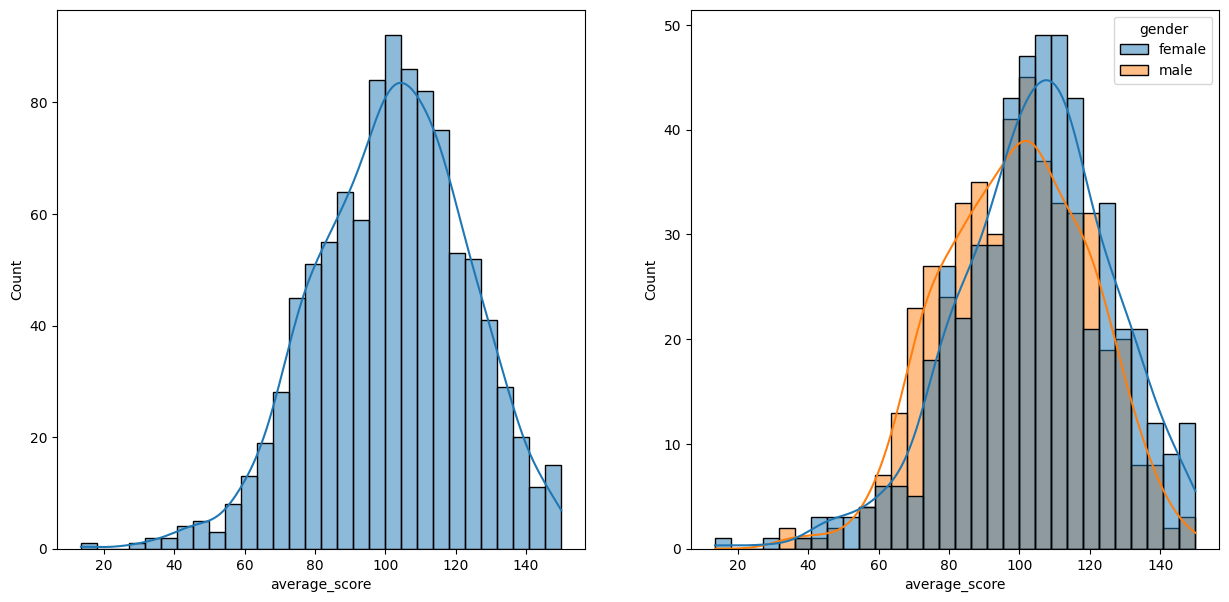

In [83]:
fig, axs = plt.subplots(1,2,figsize=(15, 7))
sns.histplot(data=df,x="average_score",bins=30,kde=True,ax=axs[0])
sns.histplot(data=df,x="average_score",bins=30,kde=True,ax=axs[1],hue="gender")

<Axes: xlabel='total_score', ylabel='Count'>

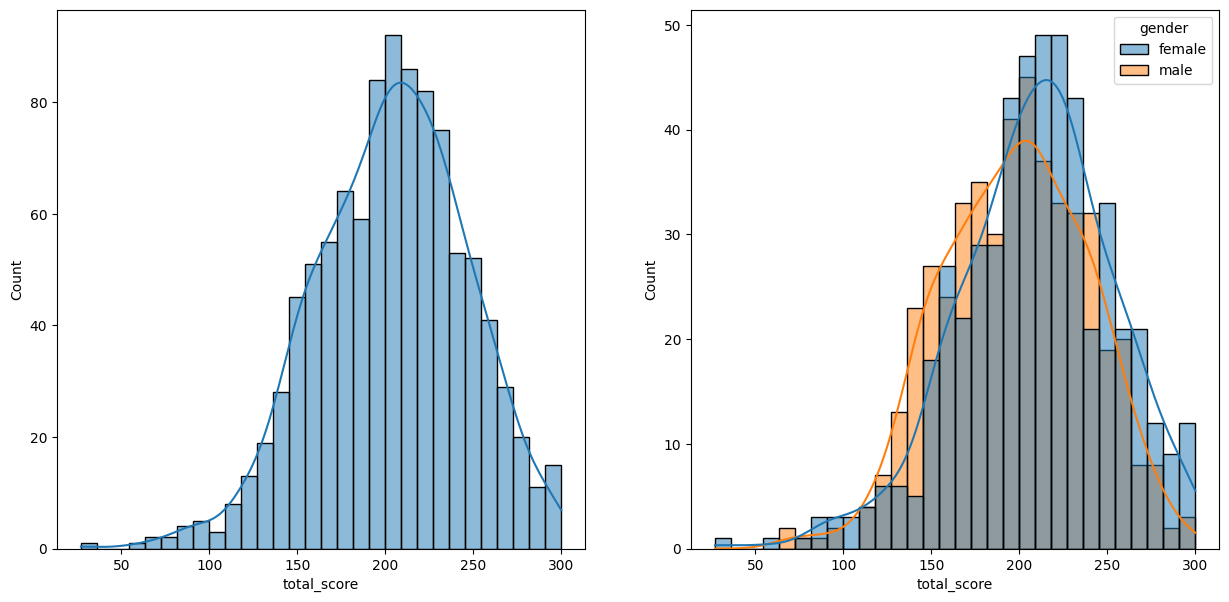

In [78]:
fig, axs = plt.subplots(1,2,figsize=(15, 7))
sns.histplot(data=df,x="total_score",bins=30,kde=True,ax=axs[0])
sns.histplot(data=df,x="total_score",bins=30,kde=True,ax=axs[1],hue="gender")

Insights

- Female students tend to perform well then male students.

In [85]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

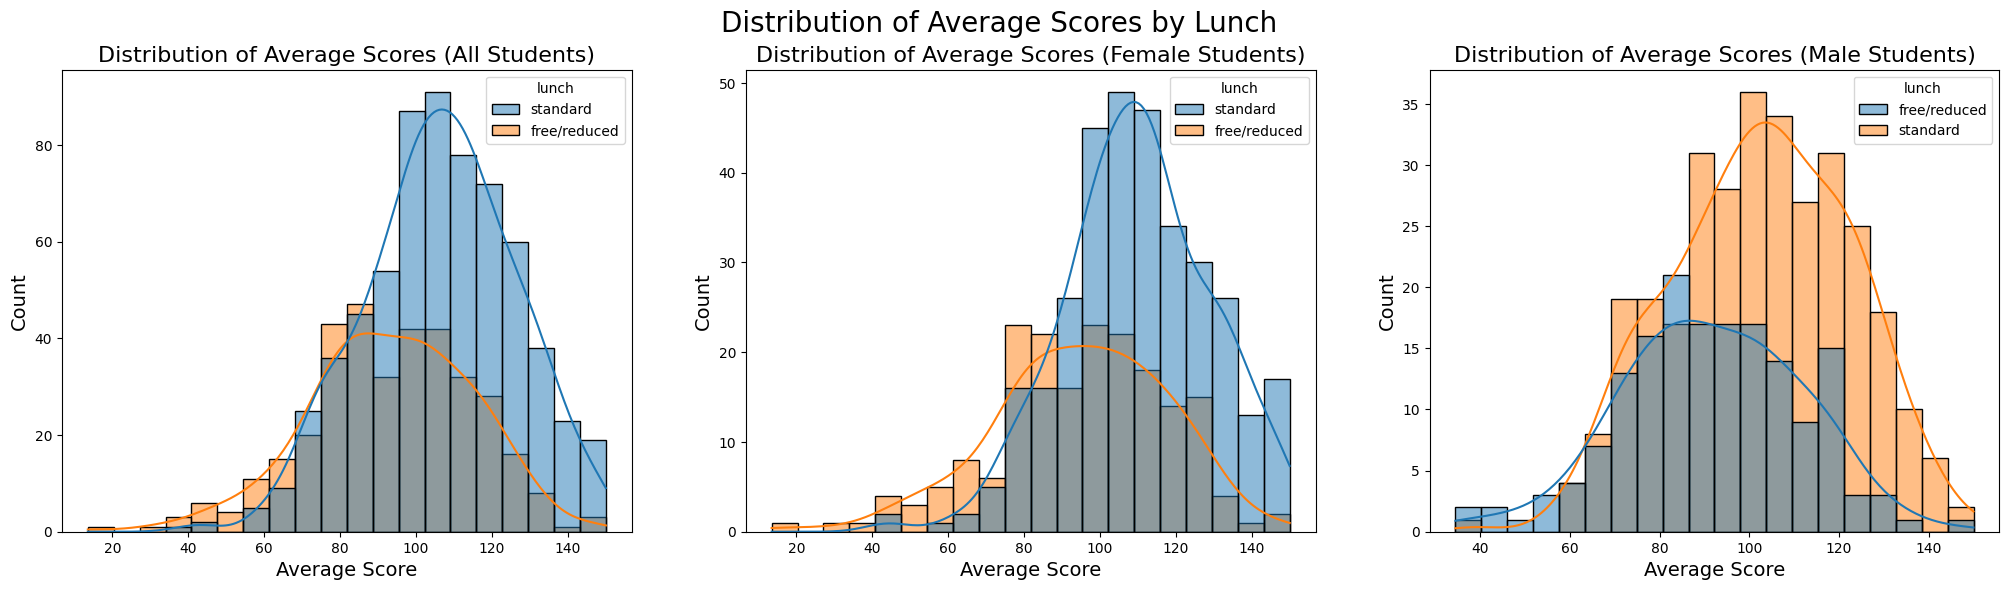

In [129]:
fig, axs = plt.subplots(1,3,figsize=(25,6))
sns.histplot(data=df,x="average_score",kde=True,bins=20,ax=axs[0],hue="lunch")
axs[0].set_title("Distribution of Average Scores (All Students)", fontsize=16)
axs[0].set_xlabel("Average Score", fontsize=14)
axs[0].set_ylabel("Count", fontsize=14)

sns.histplot(data=df[df['gender']=='female'],x="average_score",kde=True,bins=20,ax=axs[1],hue="lunch")
axs[1].set_title("Distribution of Average Scores (Female Students)", fontsize=16)
axs[1].set_xlabel("Average Score", fontsize=14)
axs[1].set_ylabel("Count", fontsize=14)

sns.histplot(data=df[df['gender']=='male'],x="average_score",kde=True,bins=20,ax=axs[2],hue="lunch")
axs[2].set_title("Distribution of Average Scores (Male Students)", fontsize=16)
axs[2].set_xlabel("Average Score", fontsize=14)
axs[2].set_ylabel("Count", fontsize=14)

fig.suptitle("Distribution of Average Scores by Lunch", fontsize=20)
plt.show()

Insights

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

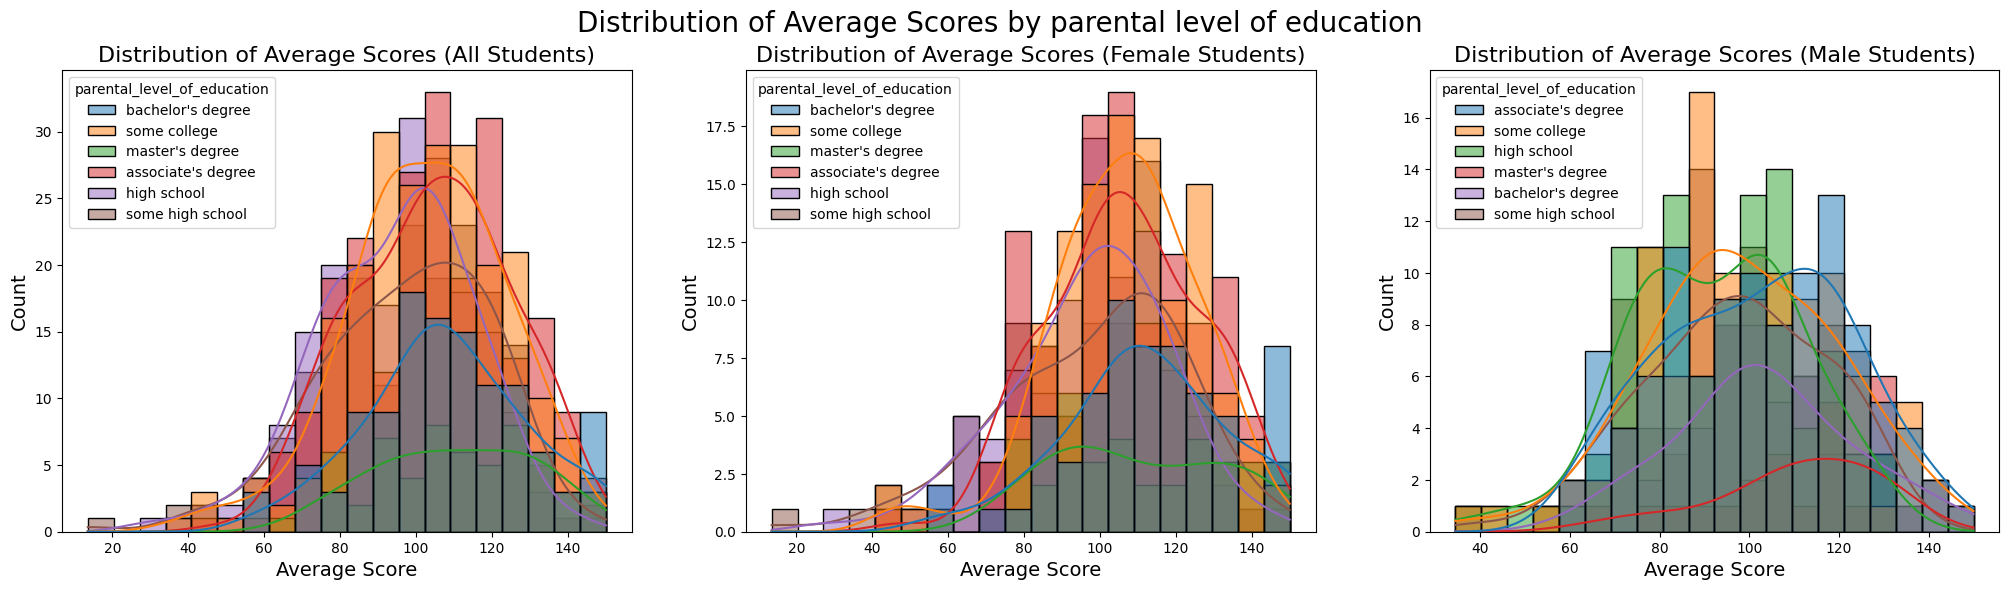

In [128]:
fig, axs = plt.subplots(1,3,figsize=(25,6))
sns.histplot(data=df,x="average_score",kde=True,bins=20,ax=axs[0],hue="parental_level_of_education")
axs[0].set_title("Distribution of Average Scores (All Students)", fontsize=16)
axs[0].set_xlabel("Average Score", fontsize=14)
axs[0].set_ylabel("Count", fontsize=14)

sns.histplot(data=df[df['gender']=='female'],x="average_score",kde=True,bins=20,ax=axs[1],hue="parental_level_of_education")
axs[1].set_title("Distribution of Average Scores (Female Students)", fontsize=16)
axs[1].set_xlabel("Average Score", fontsize=14)
axs[1].set_ylabel("Count", fontsize=14)

sns.histplot(data=df[df['gender']=='male'],x="average_score",kde=True,bins=20,ax=axs[2],hue="parental_level_of_education")
axs[2].set_title("Distribution of Average Scores (Male Students)", fontsize=16)
axs[2].set_xlabel("Average Score", fontsize=14)
axs[2].set_ylabel("Count", fontsize=14)

fig.suptitle("Distribution of Average Scores by parental level of education", fontsize=20)
plt.show()

Insights

- In general parent's education don't help student perform well in exam.


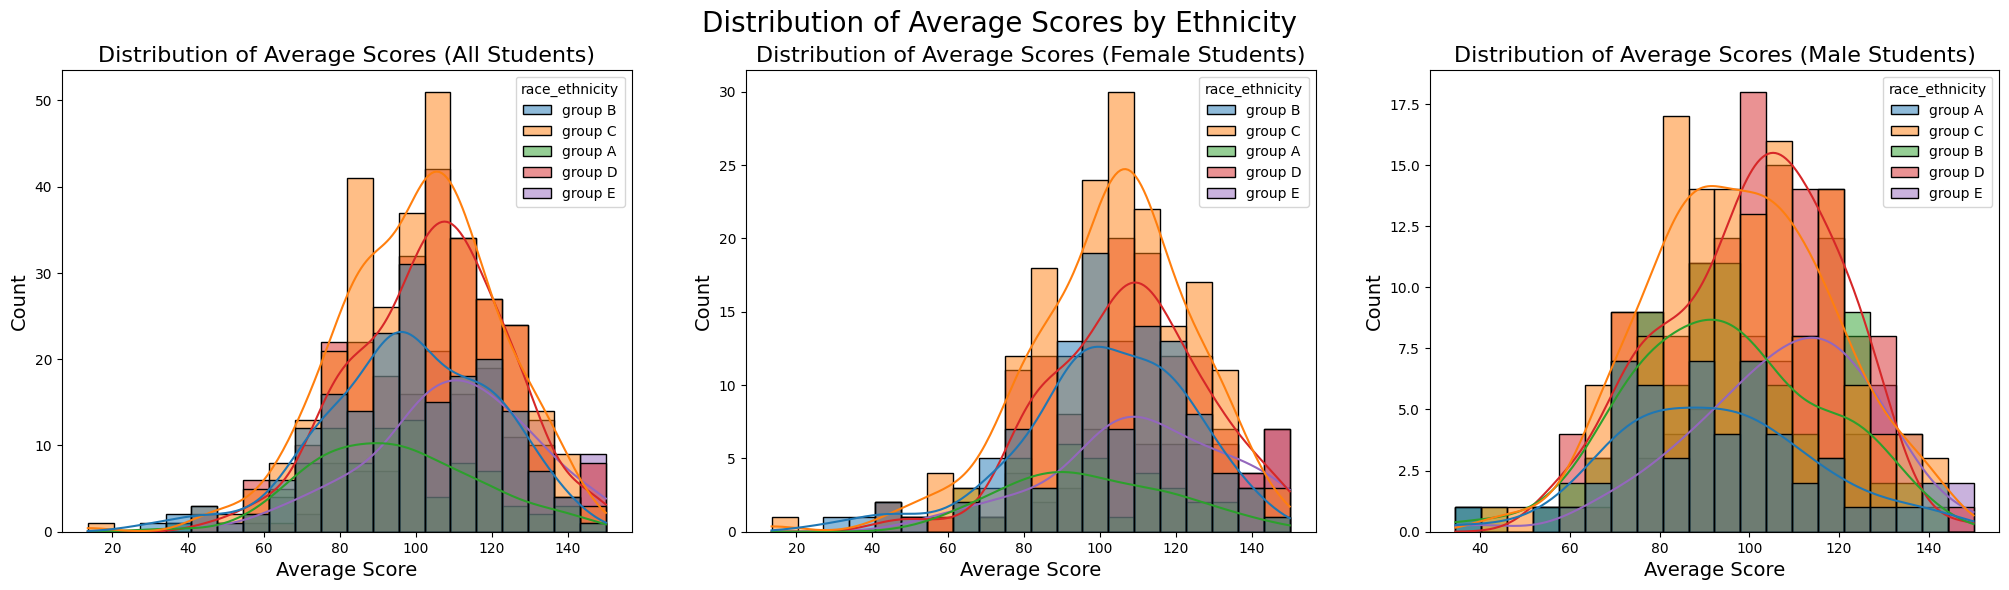

In [126]:
fig, axs = plt.subplots(1,3,figsize=(25,6))
sns.histplot(data=df,x="average_score",kde=True,bins=20,ax=axs[0],hue="race_ethnicity")
axs[0].set_title("Distribution of Average Scores (All Students)", fontsize=16)
axs[0].set_xlabel("Average Score", fontsize=14)
axs[0].set_ylabel("Count", fontsize=14)

sns.histplot(data=df[df['gender']=='female'],x="average_score",kde=True,bins=20,ax=axs[1],hue="race_ethnicity")
axs[1].set_title("Distribution of Average Scores (Female Students)", fontsize=16)
axs[1].set_xlabel("Average Score", fontsize=14)
axs[1].set_ylabel("Count", fontsize=14)

sns.histplot(data=df[df['gender']=='male'],x="average_score",kde=True,bins=20,ax=axs[2],hue="race_ethnicity")
axs[2].set_title("Distribution of Average Scores (Male Students)", fontsize=16)
axs[2].set_xlabel("Average Score", fontsize=14)
axs[2].set_ylabel("Count", fontsize=14)

fig.suptitle("Distribution of Average Scores by Ethnicity", fontsize=20)
plt.show()

Insights

- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

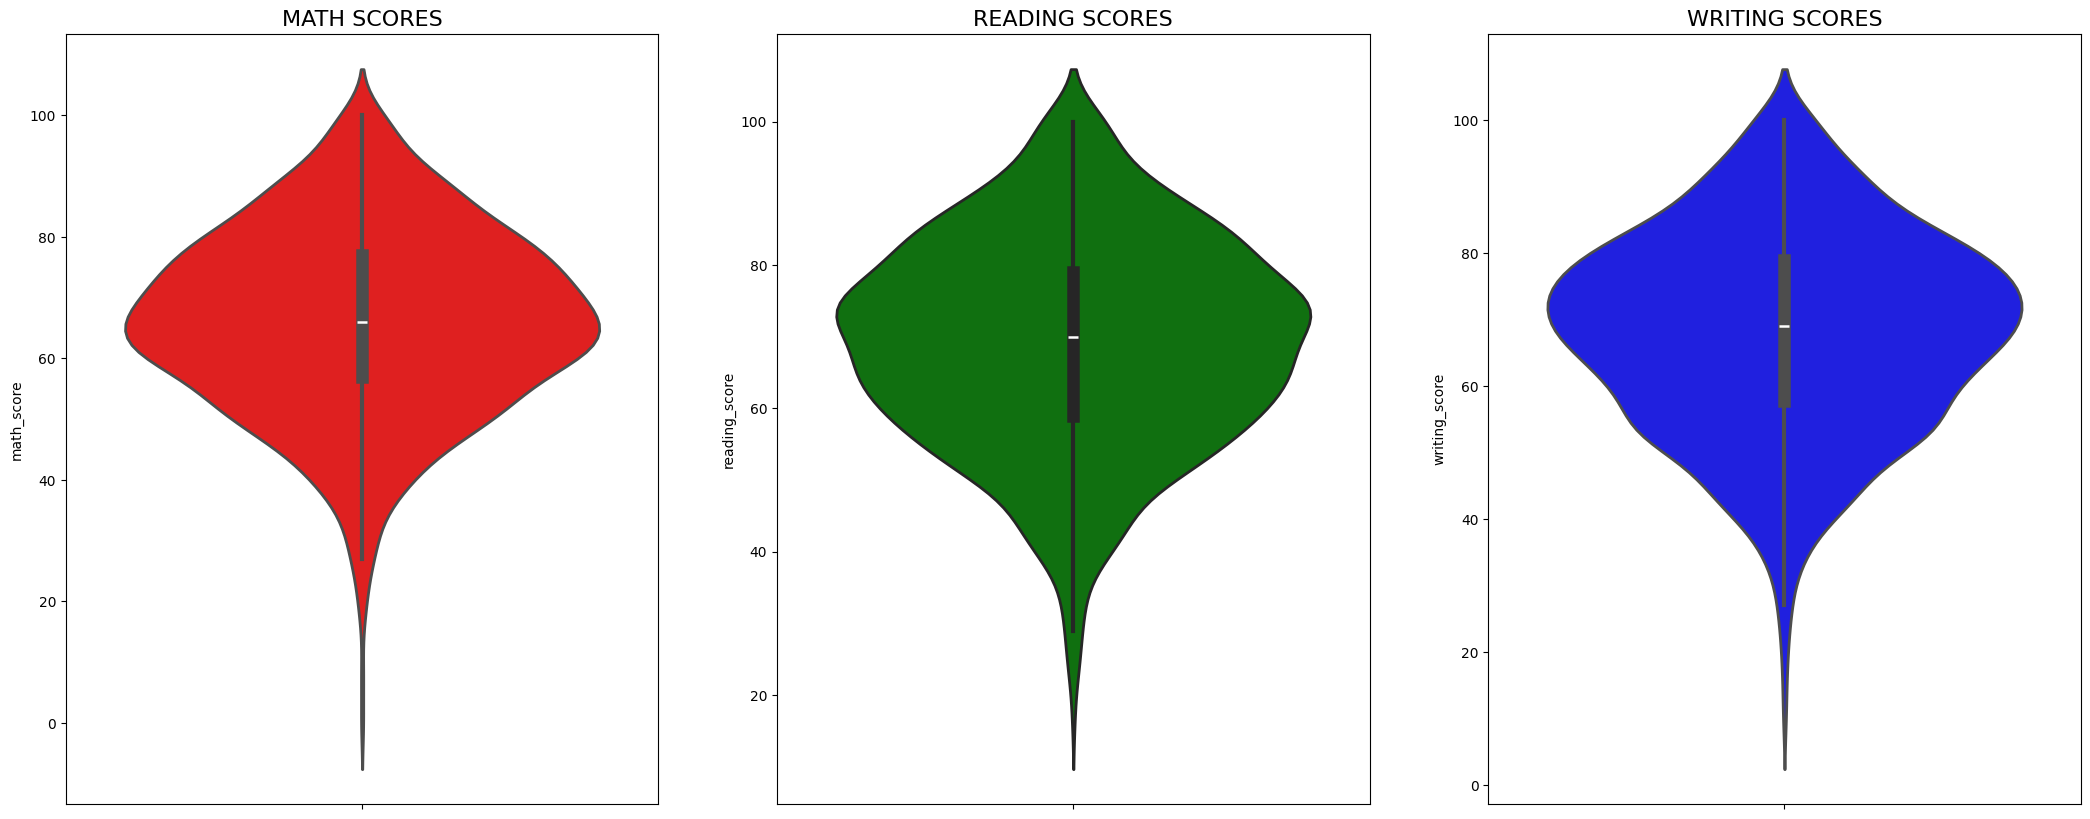

In [145]:
fig, axs = plt.subplots(1,3,figsize=(26,10))
sns.violinplot(y='math_score',data=df,color='red',linewidth=2,ax=axs[0])
axs[0].set_title('MATH SCORES', fontsize=16)
sns.violinplot(y='reading_score',data=df,color='green',linewidth=2,ax=axs[1])
axs[1].set_title('READING SCORES', fontsize=16)
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=2,ax=axs[2])
axs[2].set_title('WRITING SCORES', fontsize=16)
plt.show()

Insights
- From the above three plots its clearly visible that most of the students score in between 50-80 in all the subjects.

Multivariate Analysis using pieplot


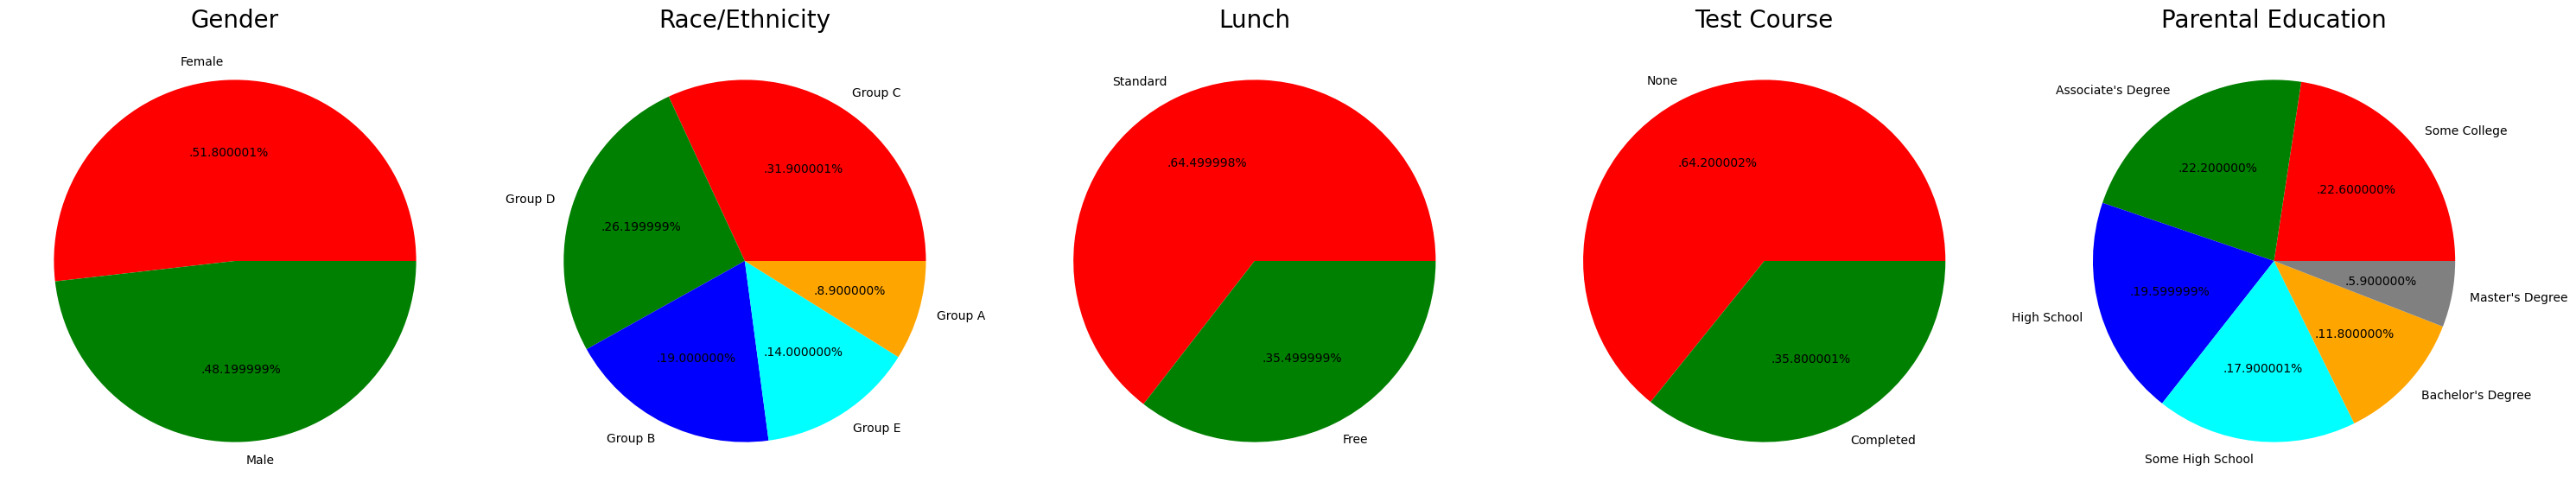

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights

- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

Feature Wise Visualization

GENDER


UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

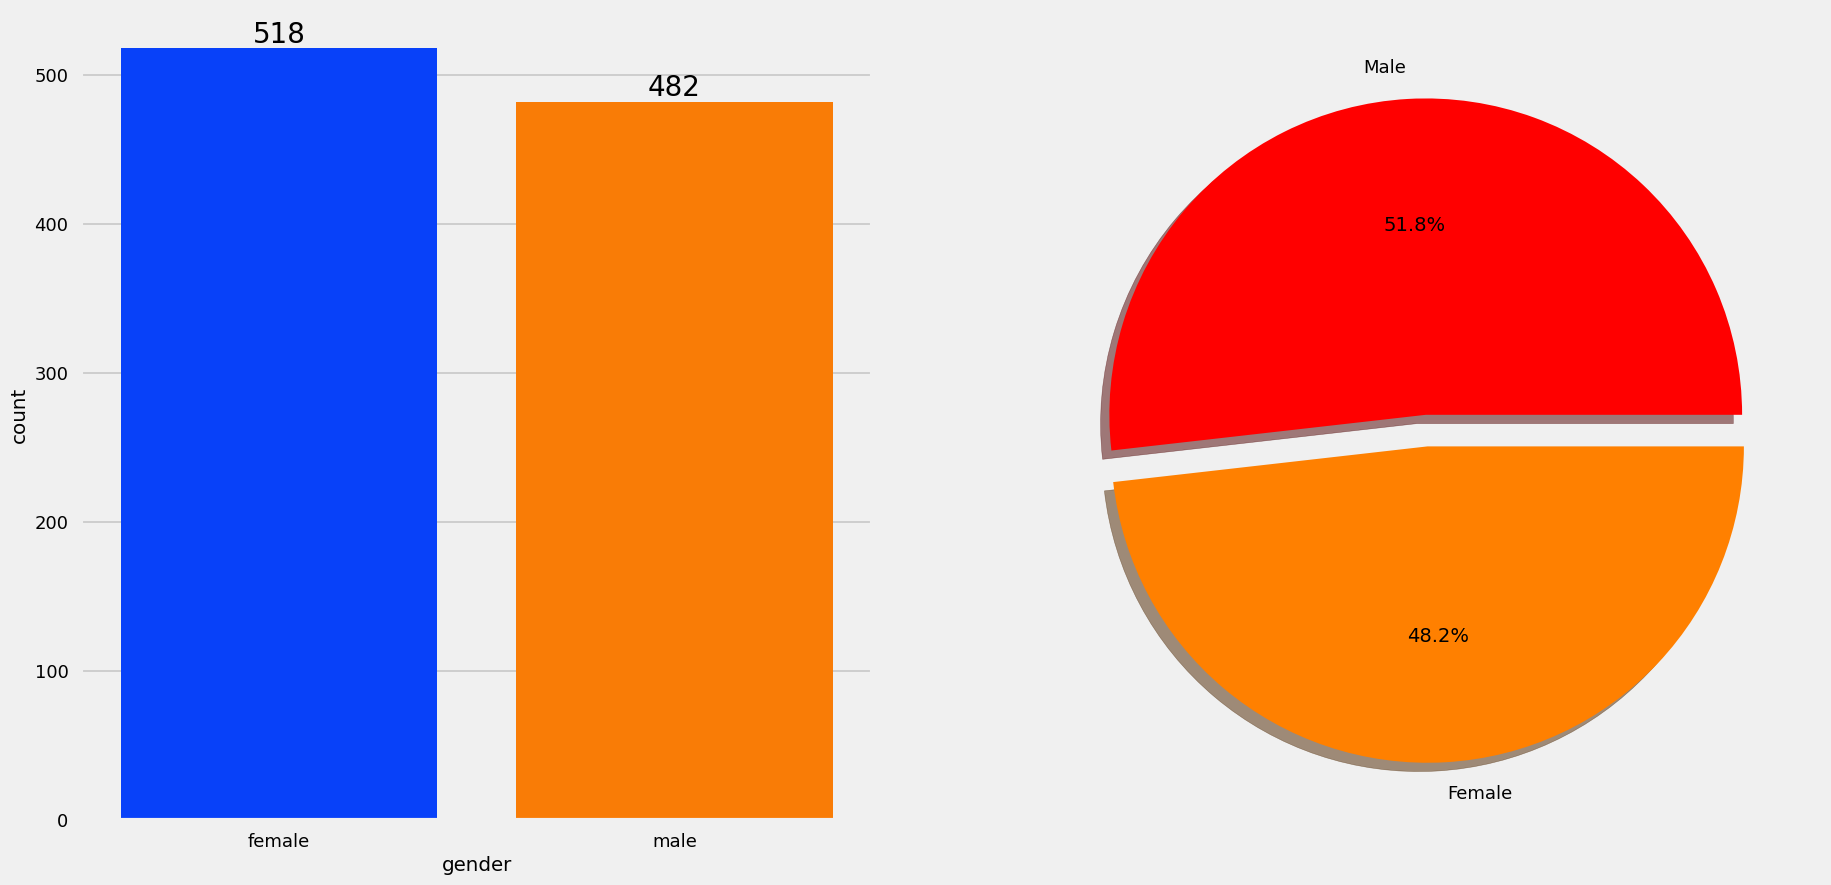

In [178]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=["#ff0000",'#ff8000'])
plt.show()

Insights

- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [ ]:
gender_group = df.groupby('gender').mean(numeric_only=True)
print(gender_group)


        math_score  reading_score  writing_score  total_score  average_score
gender                                                                      
female   63.633205      72.608108      72.467181   208.708494     104.354247
male     68.728216      65.473029      63.311203   197.512448      98.756224


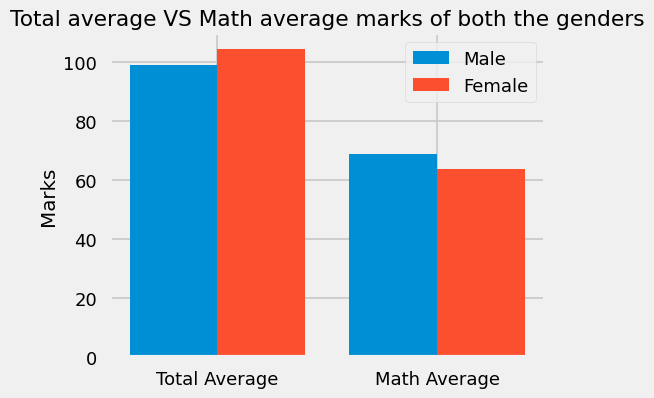

In [199]:
plt.figure(figsize=(5, 4))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average VS Math average marks of both the genders")
plt.legend()
plt.show()

Insights

- On an average females have a better overall score than men.
- Whereas males have scored higher in Maths.

RACE / ETHNICITY

UNIVARIATE ANALYSIS ( How is Group wise distribution of Race/Ethnicity?)

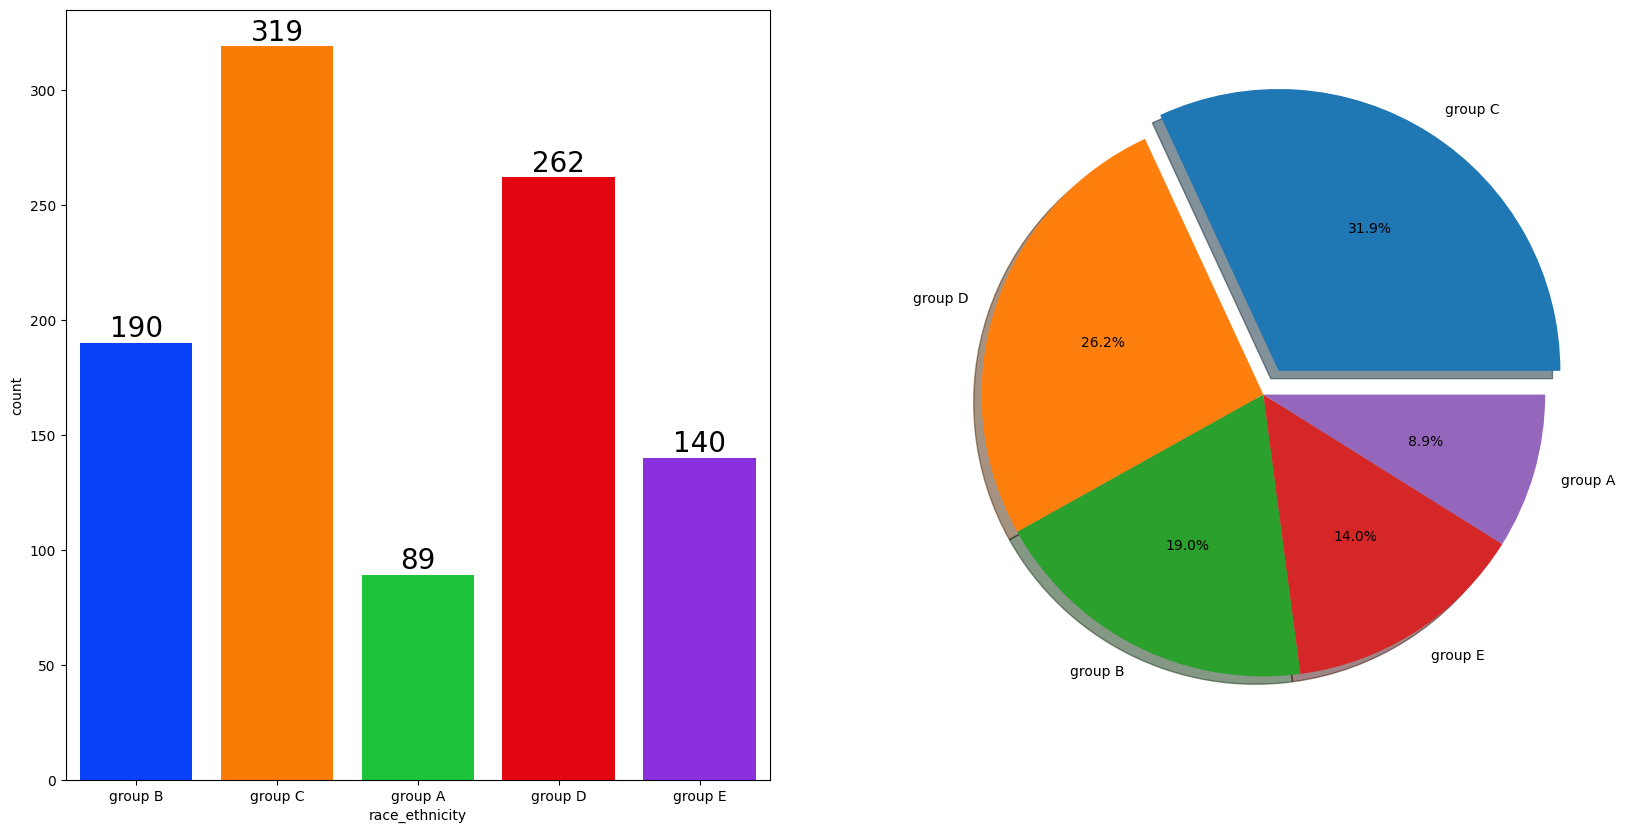

In [159]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

Insights

- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

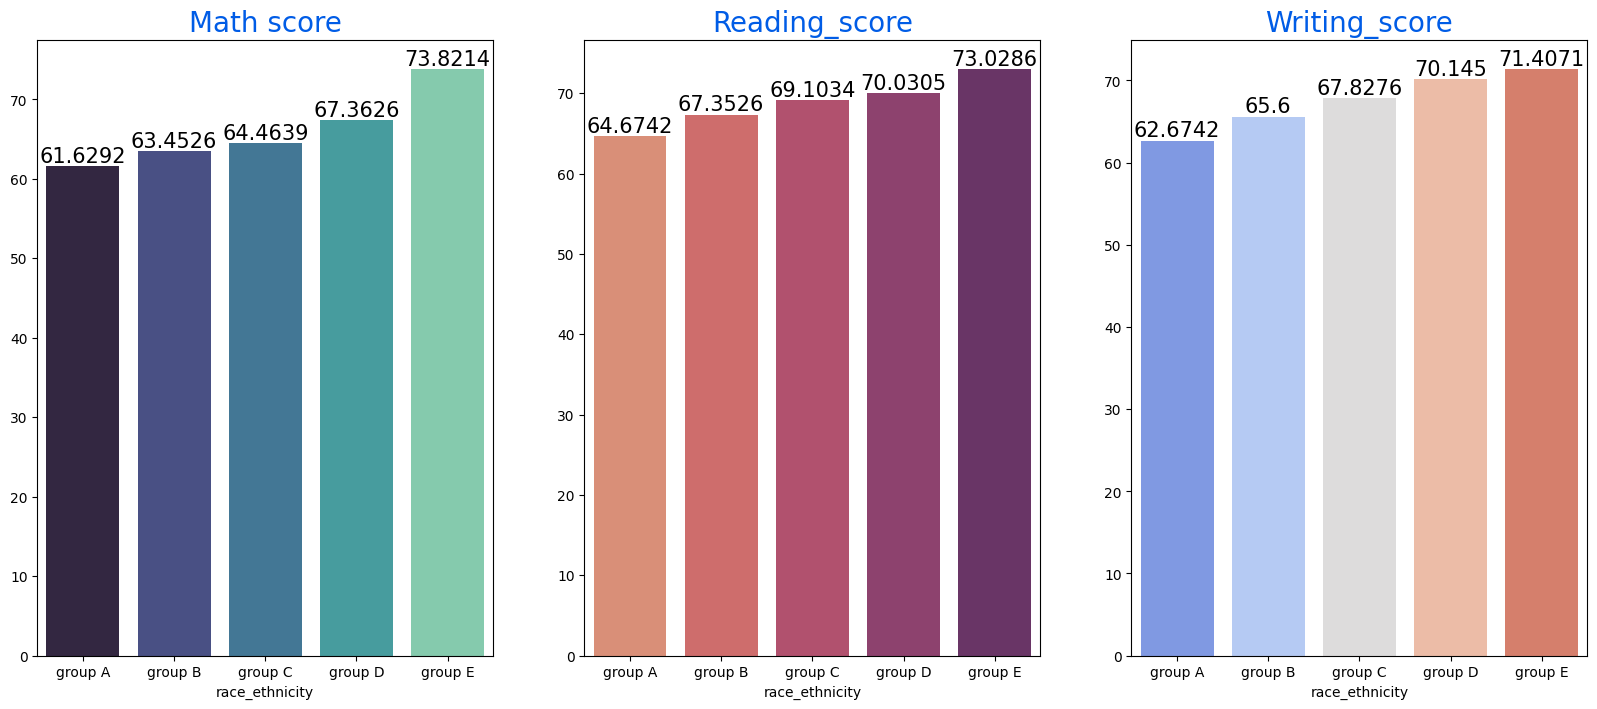

In [160]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights

- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

PARENTAL LEVEL OF EDUCATION

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

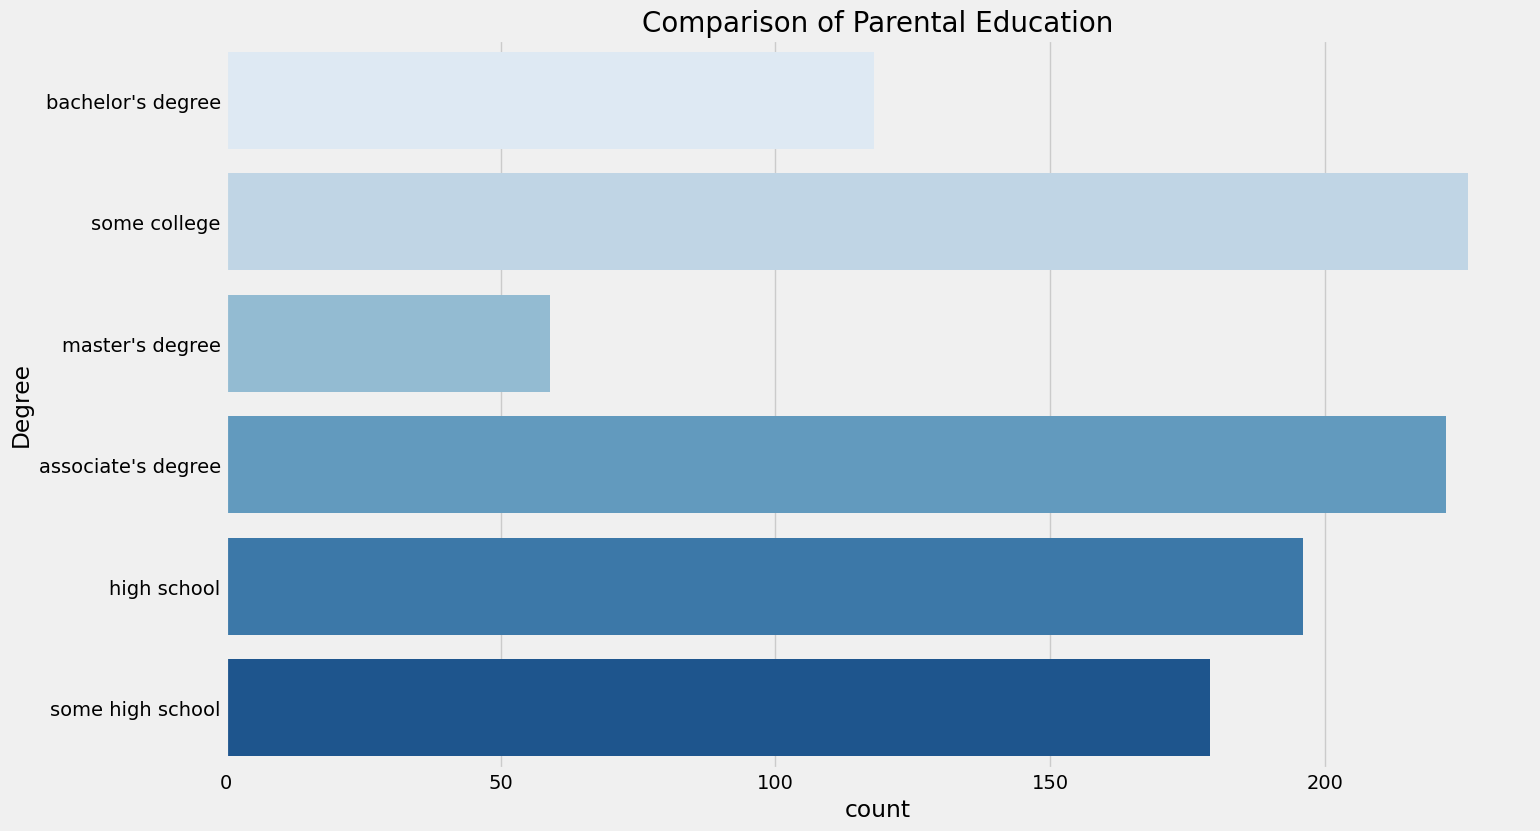

In [164]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.ylabel('Degree')
plt.xlabel('count')
plt.show()

Insights

- Largest number of parents are from some college.

BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

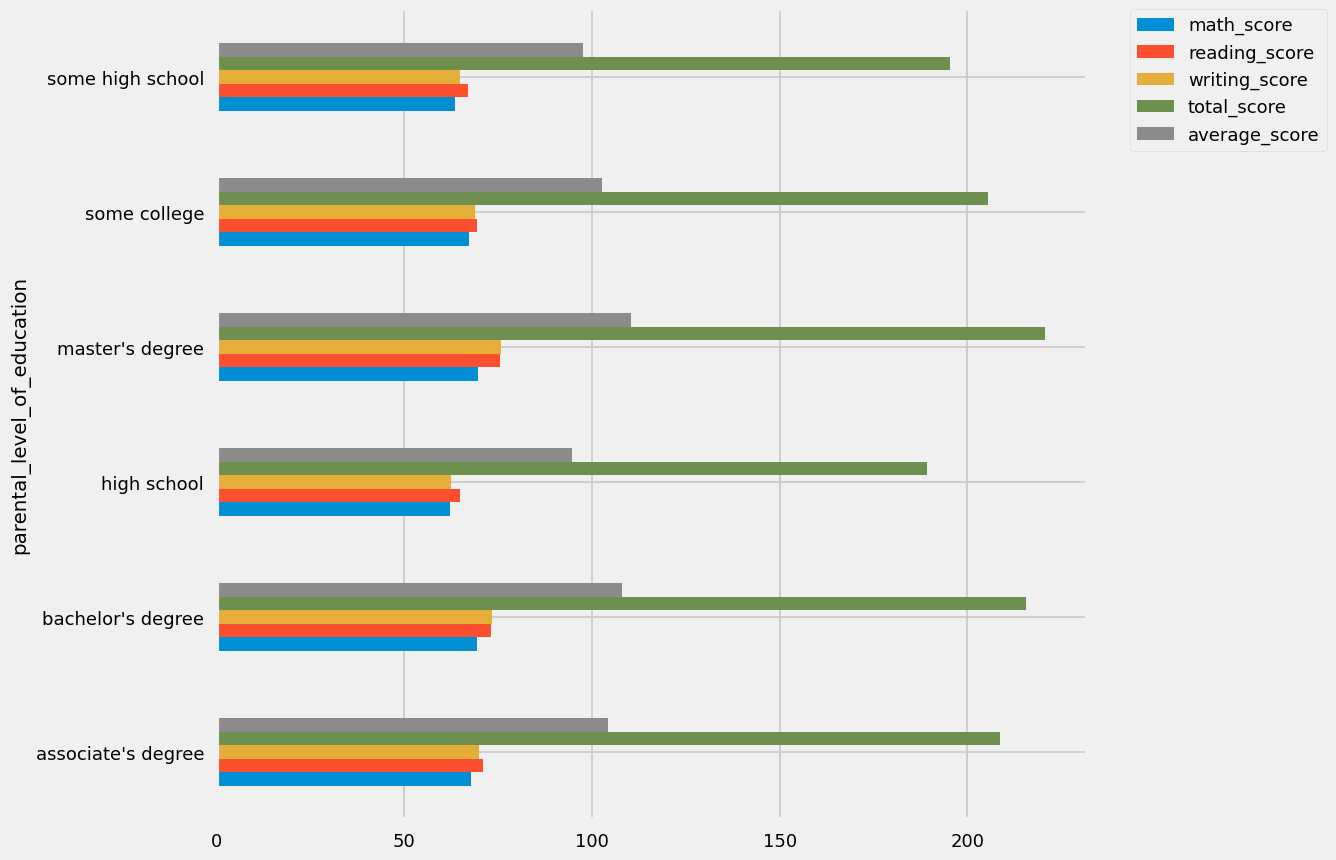

In [189]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Insights

- The score of student whose parents possess master and bachelor level education are higher than others.

LUNCH

UNIVARIATE ANALYSIS ( Which type of lunch is most common among students ? )

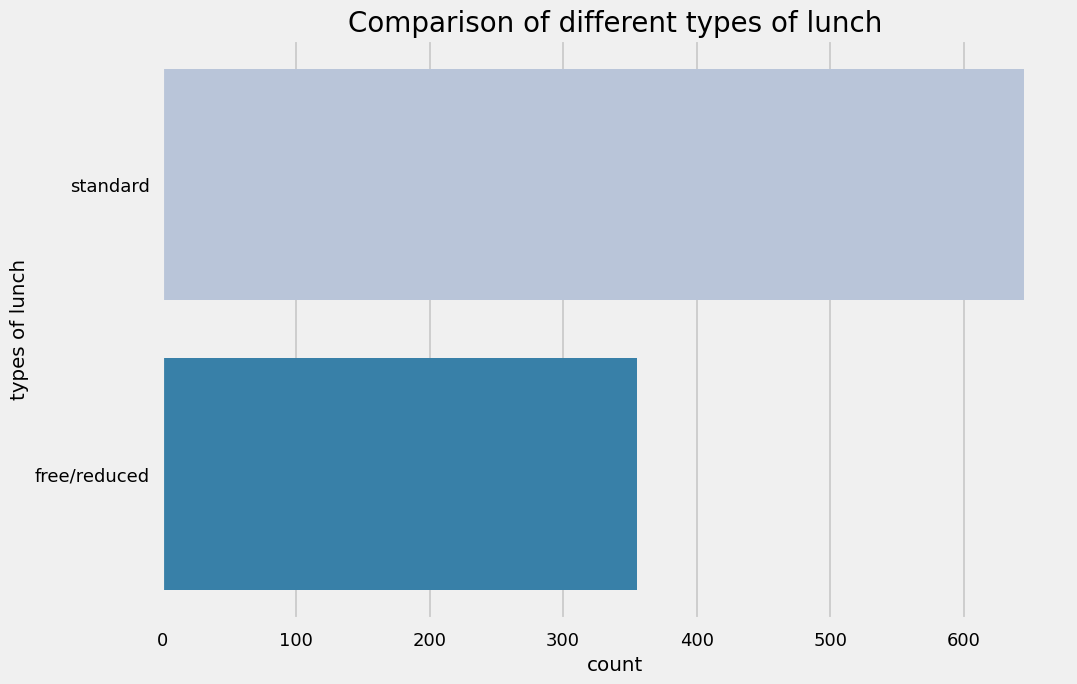

In [194]:
plt.rcParams['figure.figsize'] = (6,4)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.ylabel('types of lunch')
plt.xlabel('count')
plt.show()    

Insights

- Students being served Standard lunch was more than free lunch

BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

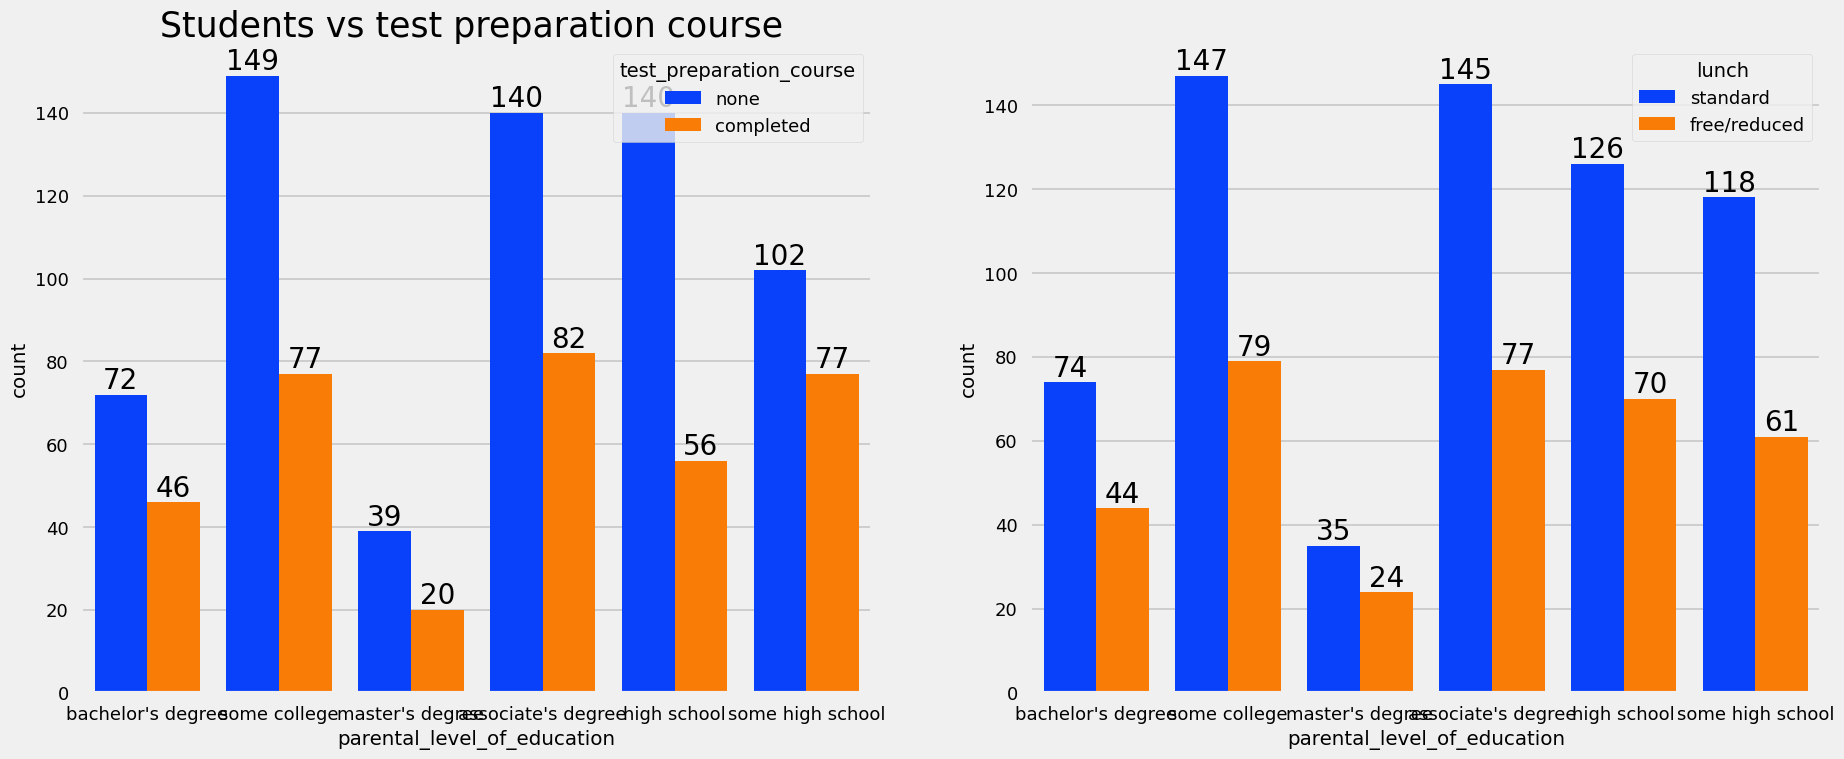

In [168]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

Insights

- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

TEST PREPARATION COURSE

BIVARIATE ANALYSIS ( Is Test preparation course has any impact on student's performance ? )

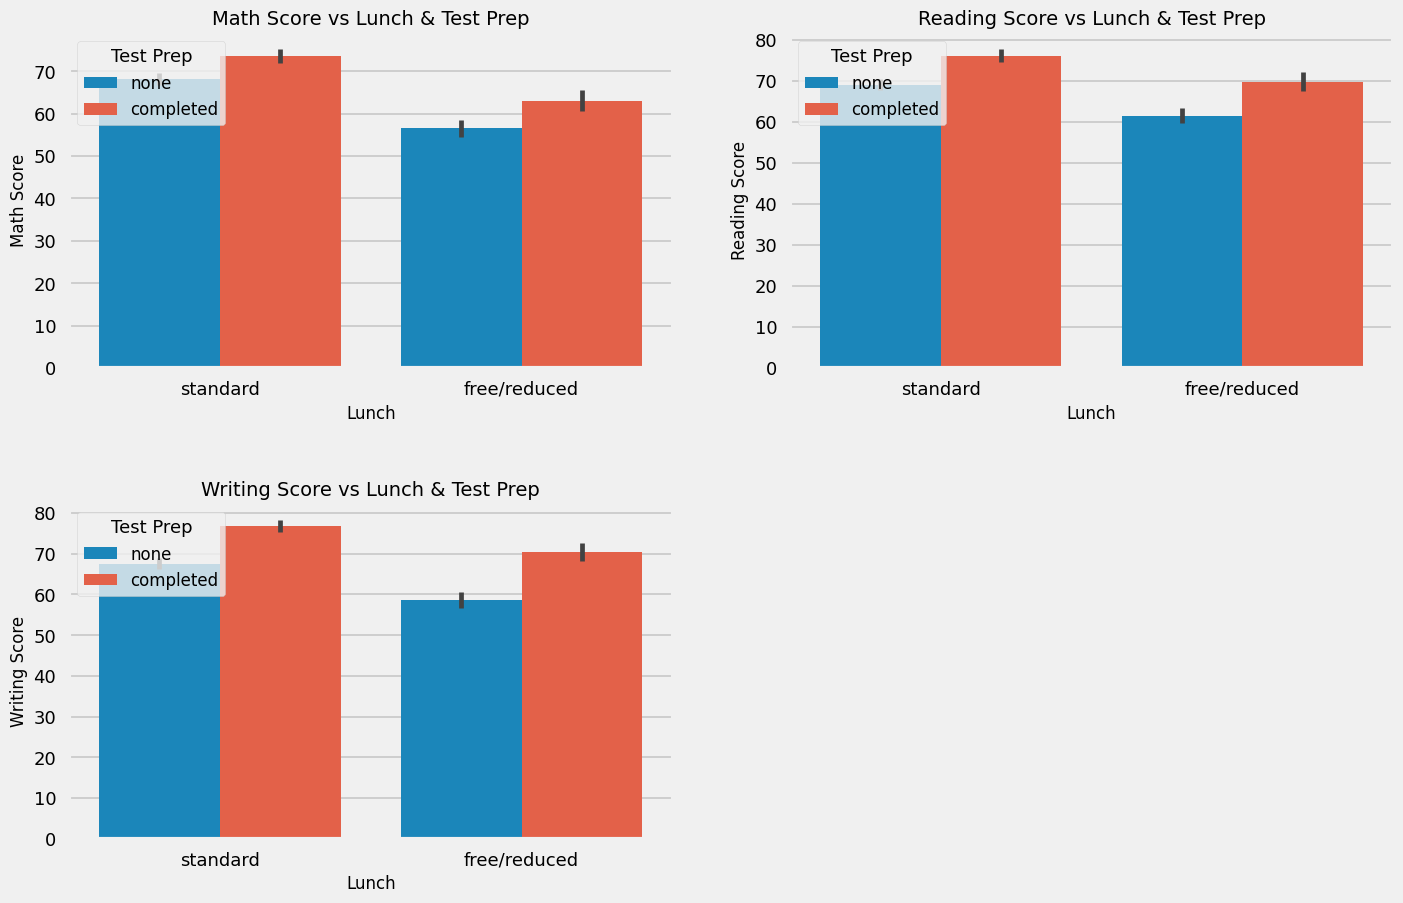

In [ ]:
# plt.figure(figsize=(12,6))
# plt.subplot(2,2,1)
# sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
# plt.subplot(2,2,2)
# sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
# plt.subplot(2,2,3)
# sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

plt.figure(figsize=(15,10))

# Plot 1 - Math Score
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.legend(title="Test Prep", loc="upper left", fontsize=12, title_fontsize=13)
plt.xlabel("Lunch", fontsize=12)
plt.ylabel("Math Score", fontsize=12)
plt.title("Math Score vs Lunch & Test Prep", fontsize=14)

# Plot 2 - Reading Score
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.legend(title="Test Prep", loc="upper left", fontsize=12, title_fontsize=13)
plt.xlabel("Lunch", fontsize=12)
plt.ylabel("Reading Score", fontsize=12)
plt.title("Reading Score vs Lunch & Test Prep", fontsize=14)

# Plot 3 - Writing Score
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.legend(title="Test Prep", loc="upper left", fontsize=12, title_fontsize=13)
plt.xlabel("Lunch", fontsize=12)
plt.ylabel("Writing Score", fontsize=12)
plt.title("Writing Score vs Lunch & Test Prep", fontsize=14)

# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()


Insights

- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

CHECKING OUTLIERS

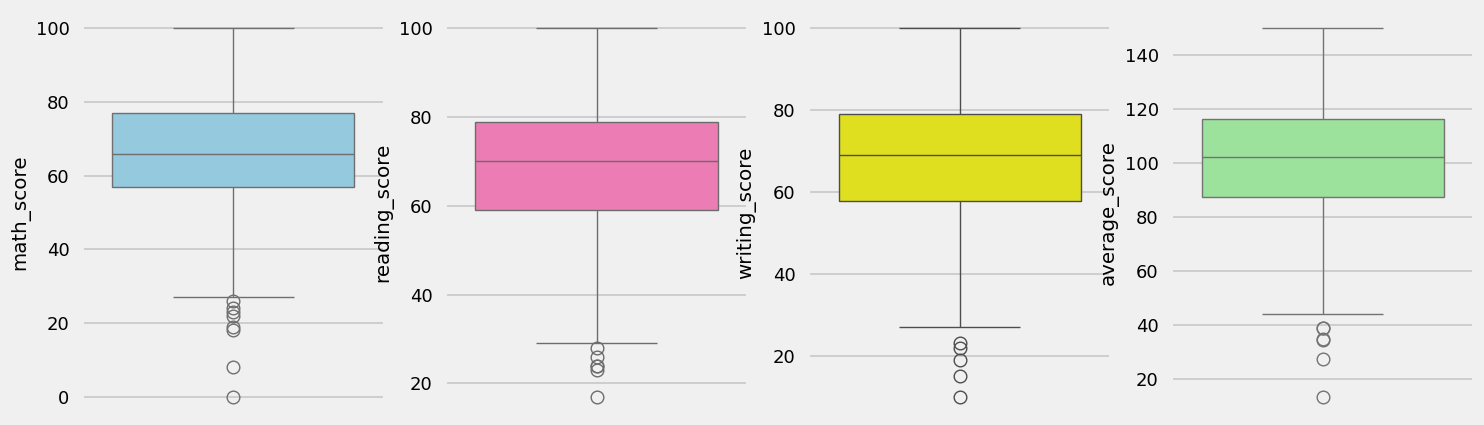

In [172]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

MUTIVARIATE ANALYSIS USING PAIRPLOT

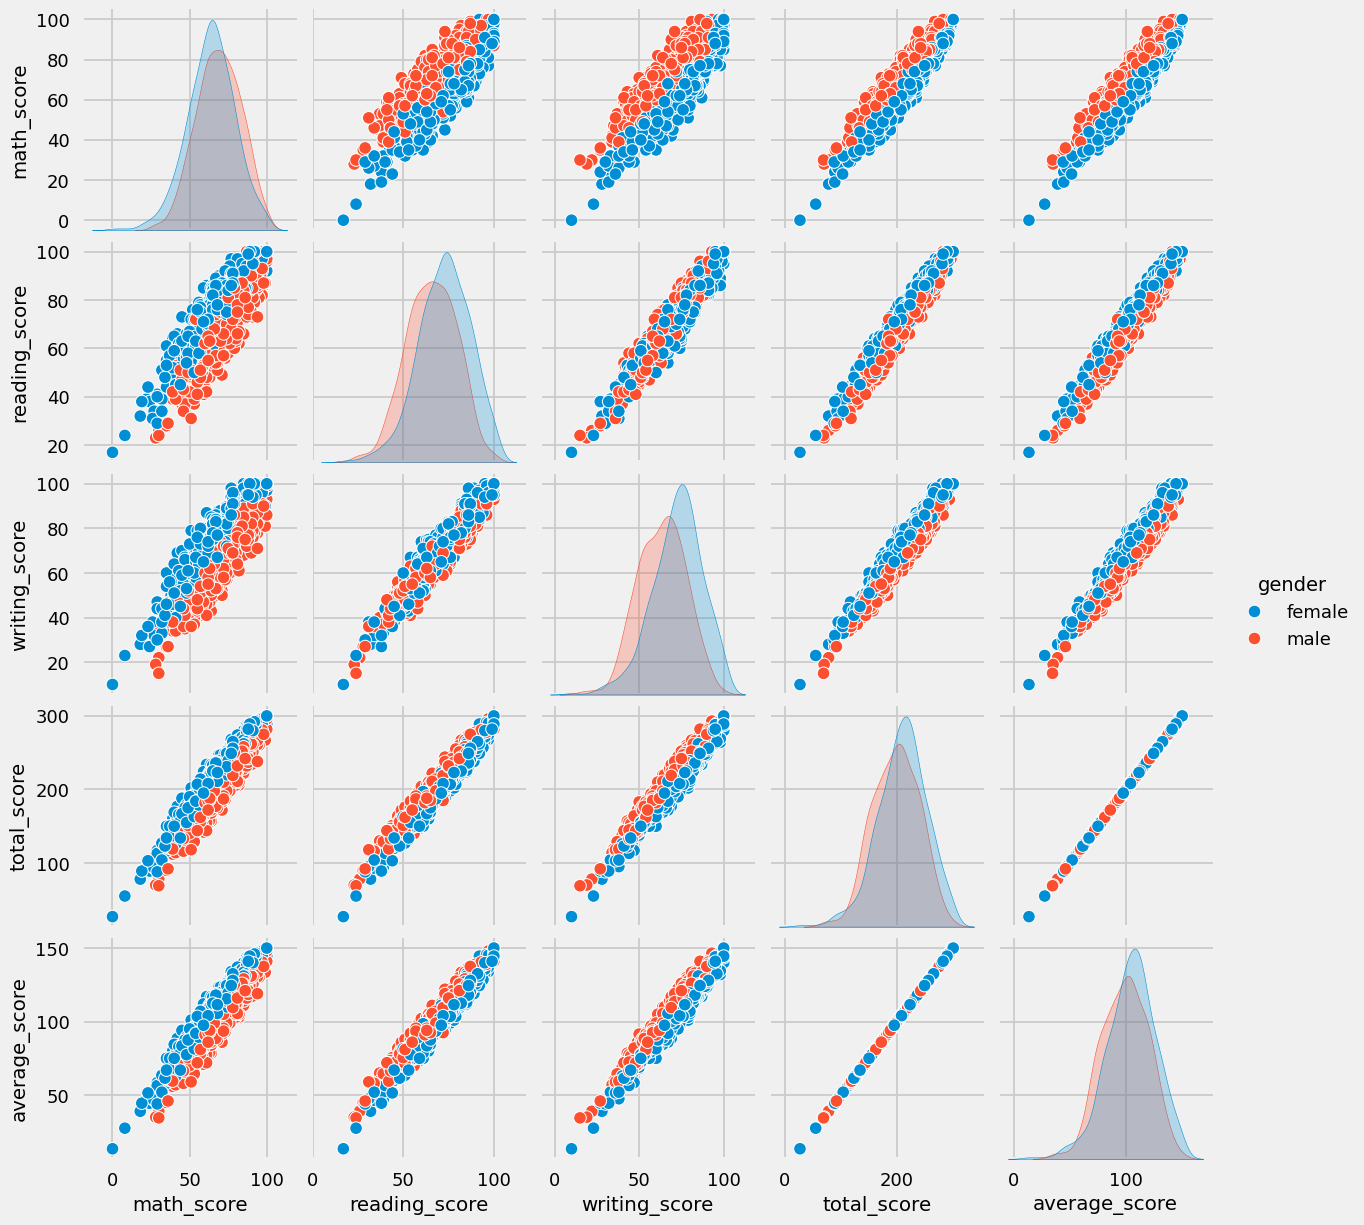

In [173]:
sns.pairplot(df,hue = 'gender')
plt.show()